[(1, '2024-02-23 12:05:06', '[[0.48223876953125, 196.540283203125, 600.5783081054688, 480.0]]', '[0.8269762992858887]', '[0]', '[1]'), (2, '2024-02-23 12:05:06', '[[2.1079623699188232, 196.95716857910156, 601.3828735351562, 480.0]]', '[0.8047552704811096]', '[0]', '[1]'), (3, '2024-02-23 12:05:07', '[[0.0, 196.9174346923828, 596.0906372070312, 480.0]]', '[0.779639482498169]', '[0]', '[1]'), (4, '2024-02-23 12:05:07', '[[0.0, 195.82025146484375, 594.9448852539062, 480.0]]', '[0.7710725665092468]', '[0]', '[1]'), (5, '2024-02-23 12:05:08', '[[4.176784038543701, 198.27867126464844, 600.548583984375, 480.0]]', '[0.8072346448898315]', '[0]', '[1]'), (6, '2024-02-23 12:05:09', '[[10.693733215332031, 199.3120574951172, 606.26318359375, 480.0]]', '[0.8108283281326294]', '[0]', '[1]'), (7, '2024-02-23 12:05:09', '[[11.594468116760254, 200.60829162597656, 604.4757690429688, 479.8724060058594]]', '[0.7393076419830322]', '[0]', '[1]'), (8, '2024-02-23 12:05:10', '[[19.607234954833984, 202.37048339

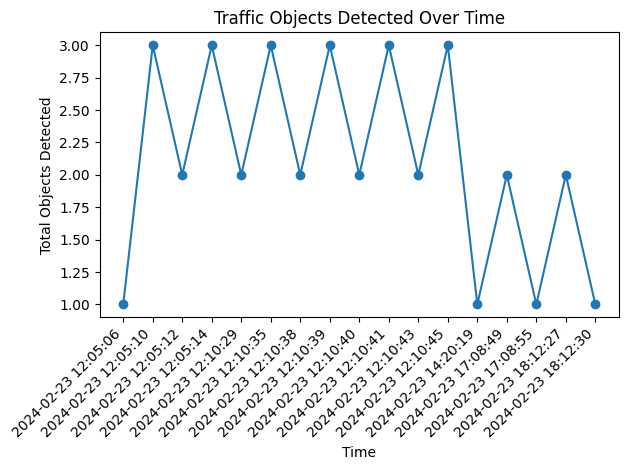

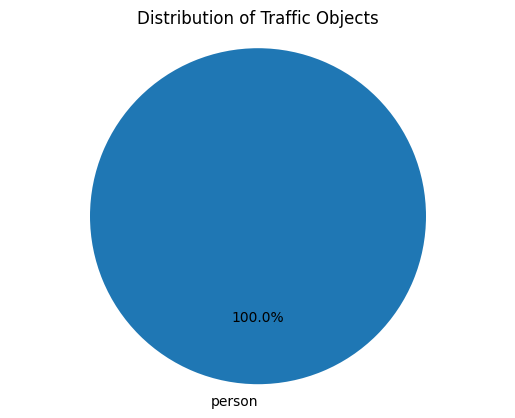

In [1]:
# Creted by: Ahmad Imam (ahmadimam657@gmail.com)



from ultralytics import YOLO
import cv2
import numpy as np
import sqlite3
import ast
from datetime import datetime
#import matplotlib
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from collections import defaultdict
# from main_utils import *
from utils import *


MODEL = "best.pt"
model = YOLO(MODEL)


#cap = cap = cv2.VideoCapture(0)
#cap.set(3, 640)
#cap.set(4, 480)
#frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#heatmap_obj = heatmap.Heatmap()
#heatmap_obj.set_args(colormap=cv2.COLORMAP_PARULA, imw=frame_width, imh=frame_height, shape="circle")


detections = []
count = 0
track_history = defaultdict(lambda: [])



conn = sqlite3.connect('predictions_database.db')
cursor = conn.cursor()


# Create predictions table if it does not exit
# create_predictions_table(cursor)

# while cap.isOpened():
#   success,image = cap.read()
#   if success:
#     results = model.track(image, persist=True,tracker="bytetrack.yaml")
#     heatmap_frame = heatmap_obj.generate_heatmap(image.copy(), results)
#     cv2.imshow("Heatmap", heatmap_frame)
#     if results[0].boxes.id != None:
#       detections = [{'time': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),'xyxy':list(results[0].boxes.xyxy.cpu().tolist()),
#       'confidence':list(results[0].boxes.conf.cpu().tolist()),
#       'class_id':list(results[0].boxes.cls.cpu().int().tolist()),
#       'object_id':list(map(int,list(results[0].boxes.id.cpu().tolist())))}]
#       frame = results[0].plot()
#       annotated_frame = plot_tracks(frame, results, track_history)
#       insert_predictions(cursor, detections)
#     else:
#       annotated_frame = None
#     if annotated_frame is not None and annotated_frame.size > 0:
#       cv2.imshow("Track", annotated_frame)
#     else:
#       cv2.imshow("Track", image)
#   else:
#     break

cursor.execute('SELECT * FROM predictions_bytime')
rows = cursor.fetchall()
print(rows)



count_objects,total_objects,time_objects = get_object_counts(model.names,cursor)


print(f"Total objects detected: {total_objects}")
print(f"type wise count:", {model.names[k]:len(v) for k,v in count_objects.items()})


times = list(time_objects.keys())
counts = list(time_objects.values())

# plot_filtered_counts_over_time(times, counts)
plot_filtered_counts_over_time(times, counts)
plot_non_zero_object_distribution(model.names,count_objects)


dt = [i['xyxy'] for i in detections]
#create_heatmap(cv2.imread('frame0.jpg','L'),dt)
